<h2 align="center"><font size="5"> Análise de Dados </font></h2>

##### Atividade 1: Replicar as análises de algum notebook no Kaggle, que estejam entre os mais votados para o dataset escolhido, para que assim você possa aprender mais funcionalidades do Pandas. Ou seja, você vai acessar algum dataset (conjunto de dados) do Kaggle, ordenar os notebooks que outros usuários criaram de acordo com o número de votos e aprender com algum que estiver entre os primeiros. Replique as análises deste notebook para outro dataset qualquer de sua escolha. Inclua células com comentários a respeito das descobertas (ex.: "vemos que pessoas da cidade XPTO gastam mais que as pessoas de outras cidades").

O dataset escolhido para replicar a análise de dados foi o <a href="https://www.kaggle.com/datasets/prasertk/netflix-subscription-price-in-different-countries?select=Netflix+subscription+fee+Dec-2021.csv">Taxa de assinatura da Netflix em diferentes países.</a> Utilizei os notebooks <a href="https://www.kaggle.com/code/kanncaa1/data-sciencetutorial-for-beginners/notebook"> Ciência de dados: tutotial para iniciantes</a>, <a href="https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization">Seleção de recursos e visualização de dados</a> e <a href="https://www.kaggle.com/code/sirapatsam/netflix-price-data-analysis-basic"> Netflix Price Data Analysis</a> para suporte e replicação

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

<h2 align="center"><font size="4"> Pré-processamento dos Dados </font></h2>

#### Estrutura dos dados

In [2]:
data = pd.read_csv("./netflix_price.csv")

In [3]:
#lendo as primeiras linhas
data.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [4]:
#Lendo as ultimas linhas
data.tail()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60
64,United States,5818,3826,1992,8.99,13.99,17.99


In [5]:
#Verificando as informações dos dodos (Qtds de não-nulos, tipo do dado)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


In [6]:
#Quantidade de linhas e colunas 
data.shape

(65, 7)

In [7]:
#Descreve os índices
data.index

RangeIndex(start=0, stop=65, step=1)

In [8]:
#Descreve as colunas 
data.columns

Index(['Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies',
       'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)',
       'Cost Per Month - Premium ($)'],
      dtype='object')

In [9]:
#Quantidade de linhas não-nulas 
data.count()

Country                          65
Total Library Size               65
No. of TV Shows                  65
No. of Movies                    65
Cost Per Month - Basic ($)       65
Cost Per Month - Standard ($)    65
Cost Per Month - Premium ($)     65
dtype: int64

In [10]:
#Verificando a média dos valores (assinaturas)
data[['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']].mean()

Cost Per Month - Basic ($)        8.368462
Cost Per Month - Standard ($)    11.990000
Cost Per Month - Premium ($)     15.612923
dtype: float64

In [11]:
#Verificando a máxima
data.max()

Country                          Venezuela
Total Library Size                    7325
No. of TV Shows                       5234
No. of Movies                         2387
Cost Per Month - Basic ($)           12.88
Cost Per Month - Standard ($)        20.46
Cost Per Month - Premium ($)         26.96
dtype: object

In [12]:
#Verificando a mínima
data.min()

Country                          Argentina
Total Library Size                    2274
No. of TV Shows                       1675
No. of Movies                          373
Cost Per Month - Basic ($)            1.97
Cost Per Month - Standard ($)          3.0
Cost Per Month - Premium ($)          4.02
dtype: object

In [13]:
#Resumo das estatísticas descritivas
data.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


<h2 align="center"><font size="4"> Data Viz </font></h2>

#### 1. Qual país tem a taxa de assinatura Netflix mais cara?

In [14]:
#Custo mais caro por mês no pacote Basic
basic = data.loc[:, ['Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies', 'Cost Per Month - Basic ($)']]
display(basic.sort_values(by = 'Cost Per Month - Basic ($)', ascending=False))

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($)
61,Switzerland,5506,3654,1852,12.88
23,Liechtenstein,3048,1712,1336,12.88
63,Denmark,4558,2978,1580,12.00
53,Sweden,4361,2973,1388,10.90
20,Israel,5713,3650,2063,10.56
...,...,...,...,...,...
59,Brazil,4972,3162,1810,4.61
5,Colombia,4991,3156,1835,4.31
0,Argentina,4760,3154,1606,3.74
19,India,5843,3718,2125,2.64


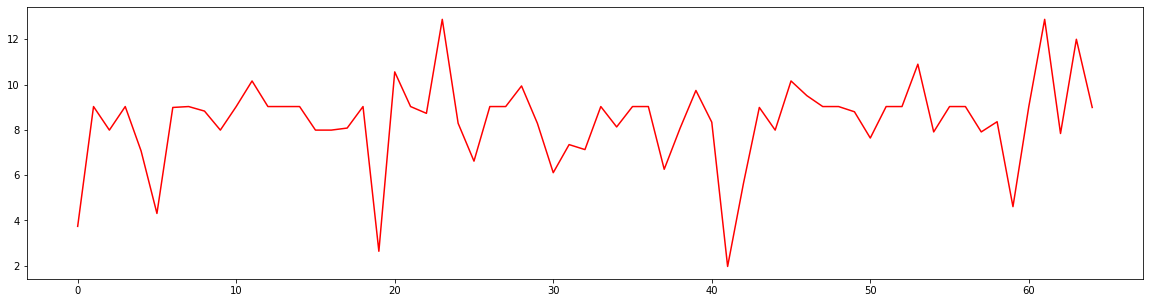

In [28]:
plt.plot(basic['Cost Per Month - Basic ($)'], color = 'red')
plt.rcParams['figure.figsize'] = (20,5)

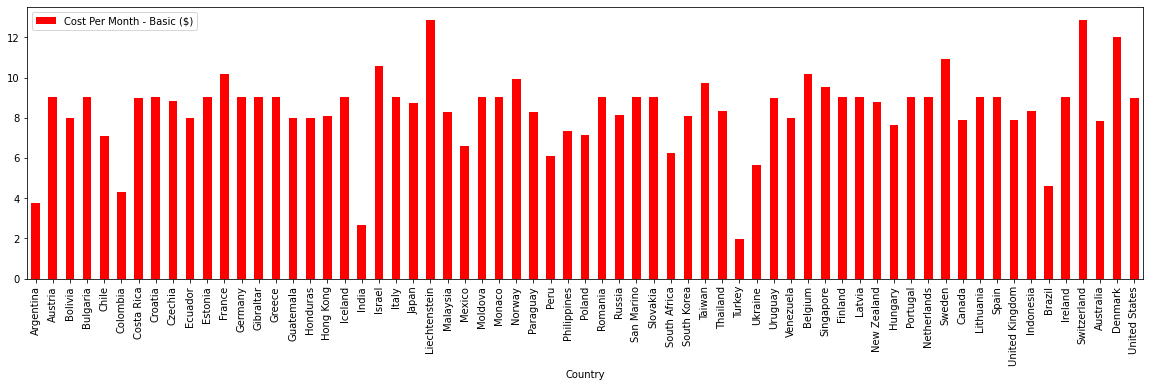

In [16]:
basic.plot(x='Country', y='Cost Per Month - Basic ($)', kind='bar', color = 'red')
plt.rcParams['figure.figsize'] = (20,5)

In [17]:
#Custo mais caro por mês no pacote Standard
standard = data.loc[:, ['Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies', 'Cost Per Month - Standard ($)']]
display(standard.sort_values(by = 'Cost Per Month - Standard ($)', ascending=False))

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Standard ($)
61,Switzerland,5506,3654,1852,20.46
23,Liechtenstein,3048,1712,1336,20.46
45,Belgium,4990,3374,1616,15.24
11,France,5445,3604,1841,15.24
20,Israel,5713,3650,2063,15.05
...,...,...,...,...,...
59,Brazil,4972,3162,1810,7.11
5,Colombia,4991,3156,1835,6.86
19,India,5843,3718,2125,6.61
0,Argentina,4760,3154,1606,6.30


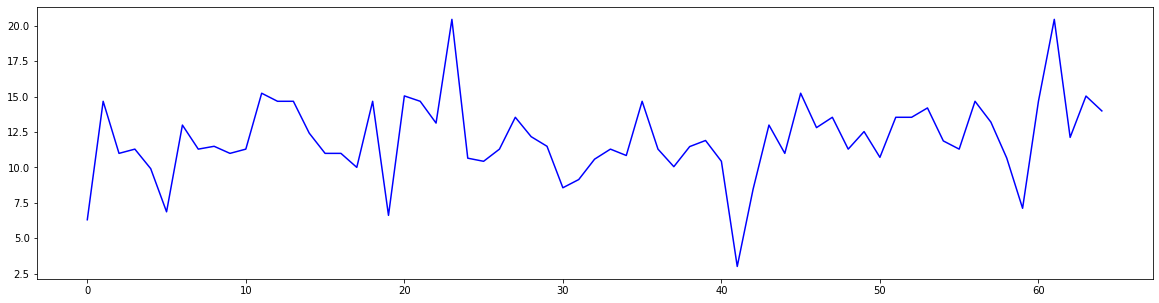

In [18]:
plt.plot(standard['Cost Per Month - Standard ($)'], color = 'blue')
plt.rcParams['figure.figsize'] = (20,5)

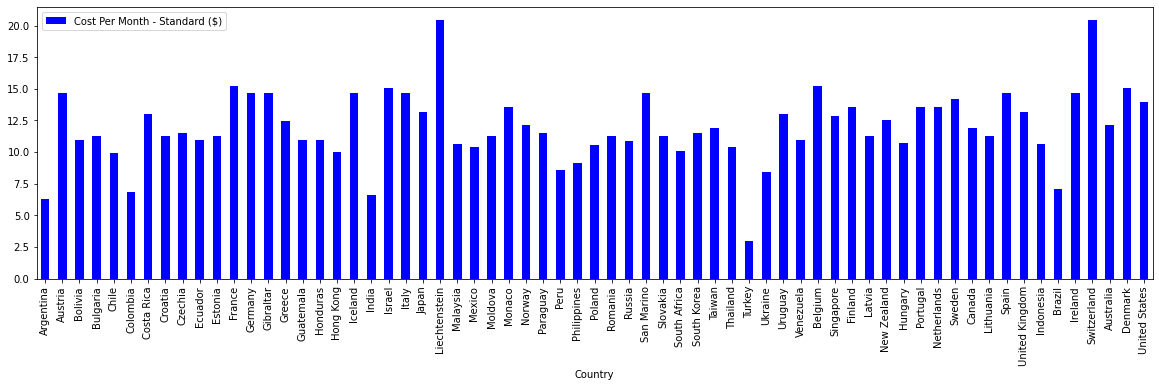

In [19]:
standard.plot(x='Country', y='Cost Per Month - Standard ($)', kind='bar', color = 'blue')
plt.rcParams['figure.figsize'] = (20,5)

In [20]:
#Custo mais caro por mês no pacote Premium 
premium = data.loc[:, ['Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies', 'Cost Per Month - Premium ($)']]
display(premium.sort_values(by = 'Cost Per Month - Premium ($)', ascending=False))

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Premium ($)
23,Liechtenstein,3048,1712,1336,26.96
61,Switzerland,5506,3654,1852,26.96
18,Iceland,6387,4426,1961,20.32
1,Austria,5640,3779,1861,20.32
21,Italy,5183,3545,1638,20.32
...,...,...,...,...,...
59,Brazil,4972,3162,1810,9.96
5,Colombia,4991,3156,1835,9.93
0,Argentina,4760,3154,1606,9.26
19,India,5843,3718,2125,8.60


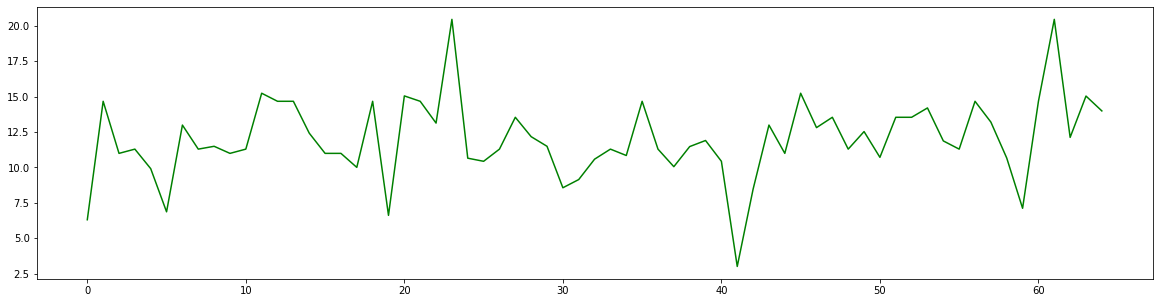

In [21]:
plt.plot(standard['Cost Per Month - Standard ($)'], color = 'green')
plt.rcParams['figure.figsize'] = (20,5)

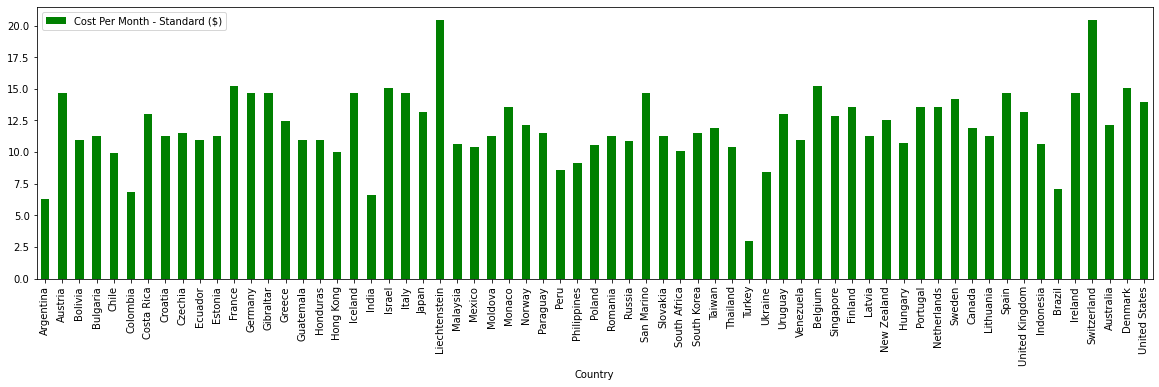

In [22]:
standard.plot(x='Country', y='Cost Per Month - Standard ($)', kind='bar', color = 'green')
plt.rcParams['figure.figsize'] = (20,5)

Comentário: podemos análisar que Switzerland e Liechtenstein lideram o ranking com os pacotes mais caros em todas as categorias: Basic (12,88) Standard (20,46) e Premium (26,96)

#### 1. Existe alguma variável que impacta no preço do serviço?

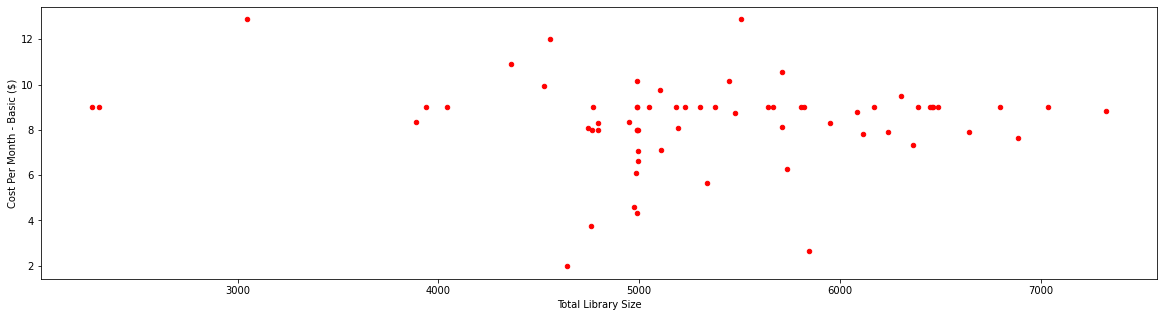

In [23]:
#Verificando se o tamanho total da biblioteca afeta no preço da assinatura (basic)
data.plot(x='Total Library Size', y='Cost Per Month - Basic ($)', kind='scatter', color='red')
plt.show()
plt.rcParams['figure.figsize'] = (20,5)

In [24]:
data_basic = data[['Total Library Size','Cost Per Month - Basic ($)','No. of TV Shows','No. of Movies']]

corr = data_basic.corr()
corr.style.background_gradient(cmap='coolwarm')

,Total Library Size,Cost Per Month - Basic ($),No. of TV Shows,No. of Movies
Total Library Size,1.000000,-0.062877,0.971146,0.849957
Cost Per Month - Basic ($),-0.062877,1.000000,-0.003814,-0.179913
No. of TV Shows,0.971146,-0.003814,1.000000,0.699786
No. of Movies,0.849957,-0.179913,0.699786,1.000000


Comentário: o gráfico de dispersão nós mostra que dificilmente há uma relação entre o tamanho total da biblioteca e o valor do serviço. A matriz de correlação mostra que programas de TV, filmes ou esses dois combinados não afetam significativamente o preço do serviço.

#### 3. Qual é a distribuição de cada conteúdo, o preço, mais a proporção de cada filme/programa de TV?

In [25]:
data['TV Shows %'] = (data['No. of TV Shows']/data['Total Library Size'])*100
data['Movies %'] = (data['No. of Movies']/data['Total Library Size'])*100

In [26]:
def plot_hist(variable):
    plt.figure(figsize = (9,5))
    plt.hist(data[variable], bins = 10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distrubiton with hist".format(variable))
    plt.show()

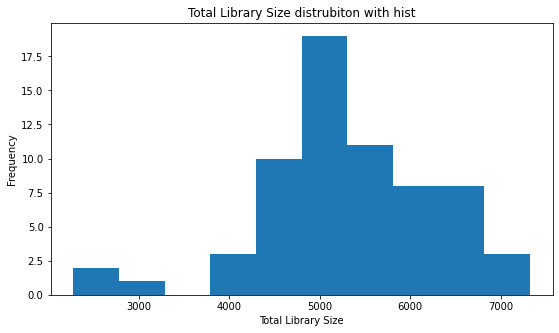

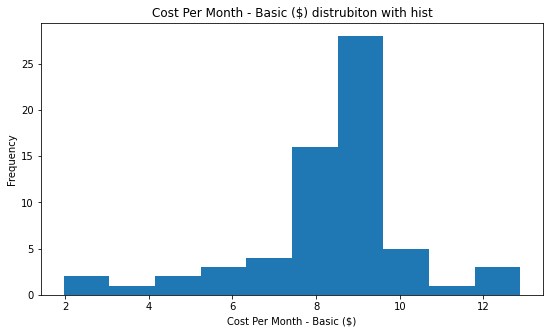

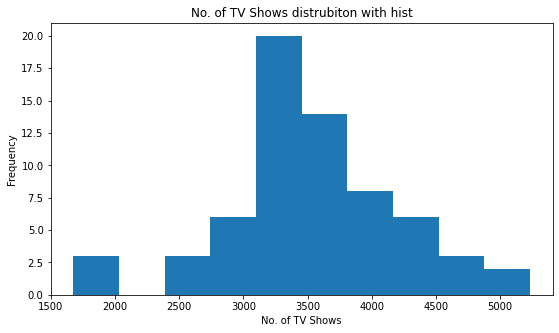

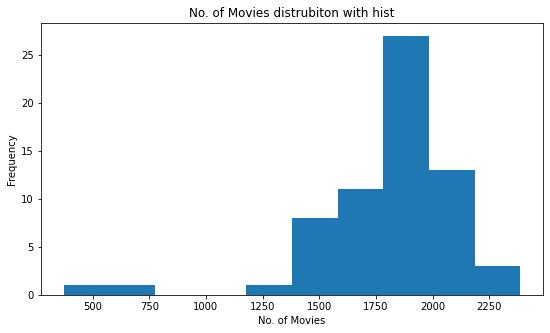

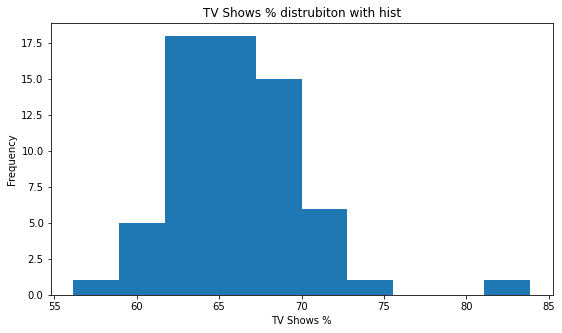

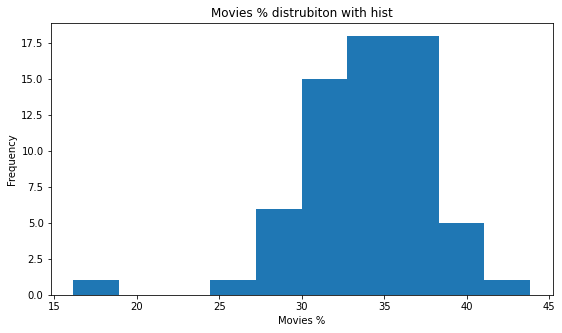

In [27]:
variable = ['Total Library Size','Cost Per Month - Basic ($)','No. of TV Shows','No. of Movies','TV Shows %','Movies %']
for n in variable:
    plot_hist(n)